In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'path/to/your/data.csv' with your actual file path)
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


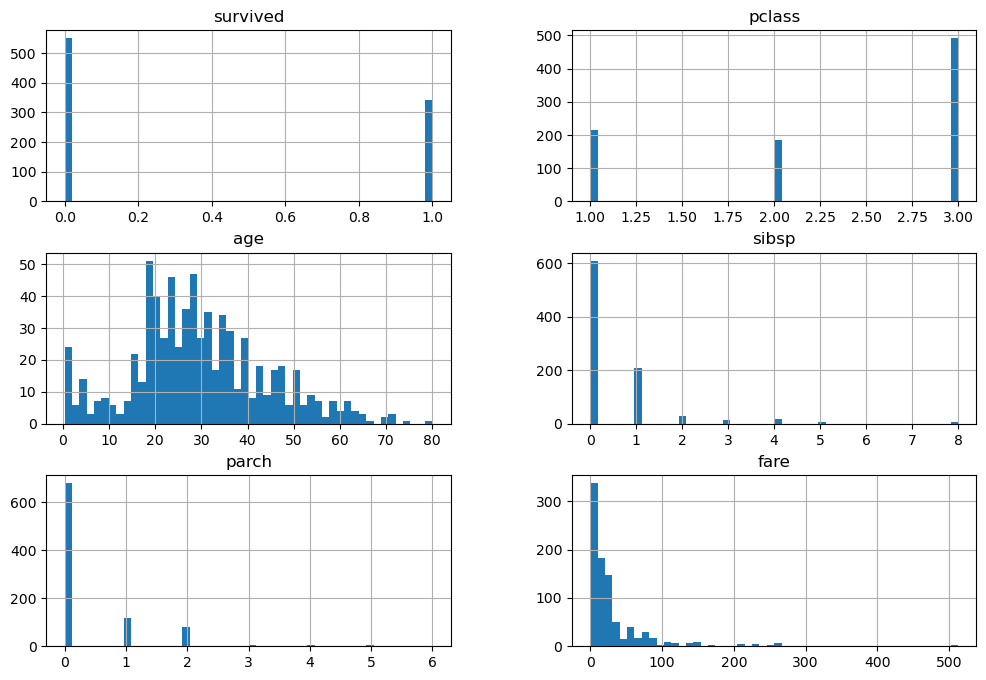

In [26]:
data.hist(bins=50,figsize=(12,8))
plt.show()

In [27]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
Ndata = data.drop(columns=['deck'])

In [29]:
Ndata.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
Ndata['age'].fillna(Ndata['age'].median(),inplace=True)

In [31]:
Ndata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [32]:
sex_dummies= pd.get_dummies(Ndata['sex'],dtype=float)

In [33]:
Ndata = pd.concat([Ndata,sex_dummies],axis = 1)
Ndata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,female,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.0,1.0


In [34]:
embarked_dummies = pd.get_dummies(Ndata['embarked'],dtype=float)
Ndata = pd.concat([Ndata,embarked_dummies],axis=1)
Ndata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.0,1.0,0.0,0.0,1.0


In [35]:
Ndata = Ndata.drop(columns ='embarked')

In [36]:
Ndata = Ndata.drop(columns ='sex')

In [37]:
Ndata['survived'] = Ndata['survived'].astype(float)

In [38]:
Ndata

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,female,male,C,Q,S
0,0.0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,0.0,1.0,0.0,0.0,1.0
1,1.0,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1.0,0.0,1.0,0.0,0.0
2,1.0,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0
3,1.0,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1.0,0.0,0.0,0.0,1.0
4,0.0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0.0,1.0,0.0,0.0,1.0
887,1.0,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0
888,0.0,3,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False,1.0,0.0,0.0,0.0,1.0
889,1.0,1,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0.0,1.0,1.0,0.0,0.0


In [39]:
Ndata = Ndata.select_dtypes(include=['float64', 'int64'])

In [40]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(Ndata, test_size=0.2, random_state=42)
x_train = train_data.drop("survived", axis=1)
y_train = train_data["survived"]
x_test = test_data.drop("survived", axis=1)
y_test = test_data["survived"]


In [41]:
Ndata = Ndata.select_dtypes(exclude=['object', 'category'])
# Handle any NaN values by filling them with the mean of the column (ignoring 'pclass', which is categorical)
numeric_columns = Ndata.columns.drop('pclass')
Ndata[numeric_columns] = Ndata[numeric_columns].fillna(Ndata[numeric_columns].mean())

# Convert 'pclass' to integer type if it's not already
Ndata['pclass'] = Ndata['pclass'].astype(int)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model and train it on the scaled training data
logreg = LogisticRegression(max_iter=1000)  
logreg.fit(x_train, y_train)

# Use the trained model to make predictions on the scaled testing data
predictions = logreg.predict(x_test)
accuracy = logreg.score(x_test, y_test)

# Calculate and print the accuracy score
print("Accuracy Score:",accuracy)
print("predictions :",predictions)

Accuracy Score: 0.8100558659217877
predictions : [0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.]
